<a href="https://colab.research.google.com/github/Shanvisingh/Prediction-using-Supervised-ML/blob/main/Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Product Recommendation System using K nearest Neighbor**

**Import Important Libraries**

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

 **Display the top five values of Modcloth dataset**

In [50]:
train=pd.read_csv("modcloth.csv")
train.head()

item_id       user_id  rating  ... brand  year split
0     7443          Alex       4  ...   NaN  2012     0
1     7443  carolyn.agan       3  ...   NaN  2012     0
2     7443         Robyn       4  ...   NaN  2012     0
3     7443            De       4  ...   NaN  2012     0
4     7443         tasha       4  ...   NaN  2012     0

[5 rows x 12 columns]

**Show the dimension of Modcloth Dataset**

In [51]:
train.shape

(99893, 12)

**Show the concise summary of training dataset**

In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99893 entries, 0 to 99892
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   item_id     99893 non-null  int64  
 1   user_id     99892 non-null  object 
 2   rating      99893 non-null  int64  
 3   timestamp   99893 non-null  object 
 4   size        78133 non-null  float64
 5   fit         81387 non-null  object 
 6   user_attr   91526 non-null  object 
 7   model_attr  99893 non-null  object 
 8   category    99893 non-null  object 
 9   brand       25913 non-null  object 
 10  year        99893 non-null  int64  
 11  split       99893 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 9.1+ MB


**Display basic statistical details like percentile, mean, std etc. of dataset**

In [53]:
train.describe()

item_id        rating          size          year         split
count   99893.000000  99893.000000  78133.000000  99893.000000  99893.000000
mean    83944.091208      4.209594      3.217322   2015.476450      0.358564
std     43558.135979      1.080633      1.885934      1.970262      0.720993
min      6454.000000      1.000000      0.000000   2010.000000      0.000000
25%     48629.000000      4.000000      2.000000   2014.000000      0.000000
50%     77878.000000      5.000000      3.000000   2016.000000      0.000000
75%    120126.000000      5.000000      4.000000   2017.000000      0.000000
max    155950.000000      5.000000      8.000000   2019.000000      2.000000

# **Data Cleaning**

**1. Check for Duplicates**

In [54]:
print('No of duplicates in train: {}'.format(sum(train.duplicated())))

No of duplicates in train: 0


**2. Checking for NaN/null values**

In [55]:
print('We have {} NaN/Null values in train'.format(train.isnull().values.sum()))

We have 122614 NaN/Null values in train


# **Data Visualization**

**Plot histogram for the rating value and its count**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


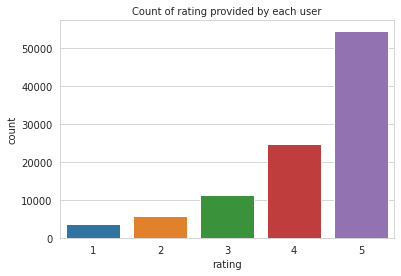

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(train.rating)
plt.xticks(rotation=0)
plt.title('Count of rating provided by each user', fontsize=10)
plt.show()

**Plot histogram for the category value and its count**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


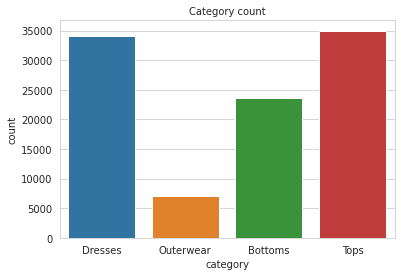

In [109]:
sns.countplot(train.category)
plt.xticks(rotation=0)
plt.title('Category count', fontsize=10)
plt.show()

**Find the total rating count of all the products**

In [68]:
combine_rating = train.dropna(axis = 0, subset = ['item_id'])
ratingCount = (combine_rating.
     groupby(by = ['item_id'])['rating'].
     count().
     reset_index().
     rename(columns = {'rating': 'totalRatingCount'})
     [['item_id', 'totalRatingCount']])
ratingCount.head()

item_id  totalRatingCount
0     6454                66
1     7443              1011
2    11960               854
3    16411              1260
4    21296              1636

 **Find the products with more than 200 ratings and an average rating greater than 3**

In [95]:
popularity_threshold = 200
rating_popular= rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold' and 'rating>=3')
rating_popular.head()

item_id       user_id  rating  ...  year  split totalRatingCount
0     7443          Alex       4  ...  2012      0             1011
1     7443  carolyn.agan       3  ...  2012      0             1011
2     7443         Robyn       4  ...  2012      0             1011
3     7443            De       4  ...  2012      0             1011
4     7443         tasha       4  ...  2012      0             1011

[5 rows x 13 columns]

# **Create the Pivot table**

In [94]:
features_df=rating_popular.pivot_table(index='item_id',columns='user_id',values='rating').fillna(0)
features_df

user_id  "Ferrari")    #  #1dad  #NAME?  ...  zurajohnson  zuzu_zoom    üêª    üòä
item_id                                  ...                                  
6454            0.0  0.0    0.0     0.0  ...          0.0        0.0  0.0  0.0
7443            0.0  0.0    0.0     0.0  ...          0.0        0.0  0.0  0.0
11960           0.0  0.0    0.0     0.0  ...          0.0        0.0  0.0  0.0
16411           0.0  0.0    0.0     0.0  ...          0.0        0.0  0.0  0.0
21296           0.0  0.0    0.0     0.0  ...          0.0        0.0  0.0  0.0
...             ...  ...    ...     ...  ...          ...        ...  ...  ...
155308          0.0  0.0    0.0     0.0  ...          0.0        0.0  0.0  0.0
155317          0.0  0.0    0.0     0.0  ...          0.0        0.0  0.0  0.0
155537          0.0  0.0    0.0     0.0  ...          0.0        0.0  0.0  0.0
155597          0.0  0.0    0.0     0.0  ...          0.0        0.0  0.0  0.0
155950          0.0  0.0    0.0     0.0  ...          0.0        0.0  0.0  0.0

[1004 rows x 38254 columns]

 **Convert the pivot table into array**

In [110]:
from scipy.sparse import csr_matrix

features_df_matrix = csr_matrix(features_df.values)



**Import Nearest Neighbours and hyperparameters selection**

In [111]:
from sklearn.neighbors import NearestNeighbors
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(features_df_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

 **To find random value from item_id**

In [101]:
query_index = np.random.choice(features_df.shape[0])
print(query_index)
distances, indices = model_knn.kneighbors(features_df.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 10)

938


**To find the 10 nearest neighbours of the selected products**

In [102]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(features_df.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, features_df.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for 154218:

1: 154176, with distance of 0.7146349272323251:
2: 155165, with distance of 0.8141653720970978:
3: 150874, with distance of 0.8465867864516134:
4: 153343, with distance of 0.8620635857281589:
5: 153696, with distance of 0.8805125375157106:
6: 153816, with distance of 0.88585397089293:
7: 154927, with distance of 0.88585397089293:
8: 153543, with distance of 0.892142140656126:
9: 152564, with distance of 0.8970779916362902:


# **Conclusion**
**We have found 10 Recommendations for the product with Id=154218. 
Different numbers of products recommentations for other products can be found using the same Model.**
